In [1]:
# reload
#%reset
%load_ext autoreload
%autoreload 2 

import warnings
import logging
import os

# DEBUG MODE
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
logging.getLogger('tensorflow').setLevel(logging.FATAL)
    
from s3l_training import s3l_training

Run with random seed:  561
GPU is available.
1
True
12.1
Concatenating runs:  range(1, 11)
Time to read csv file for run:  3.2309389114379883
Loaded run 1
Time to read csv file for run:  3.174156427383423
Loaded run 2
Time to read csv file for run:  3.1156933307647705
Loaded run 3
Time to read csv file for run:  3.0840237140655518
Loaded run 4
Time to read csv file for run:  3.10263991355896
Loaded run 5
Time to read csv file for run:  3.035801887512207
Loaded run 6
Time to read csv file for run:  3.177689790725708
Loaded run 7
Time to read csv file for run:  3.180773973464966
Loaded run 8
Time to read csv file for run:  3.0657787322998047
Loaded run 9
Time to read csv file for run:  3.2479708194732666
Loaded run 10


Seed set to 42


pretrain_data, before removing rows that dont have traffic  (1799100, 102)
pretrain_data, after removing rows that dont have traffic  (33026, 102)
X_pretrain  (32705, 92)
HYPERPARAMETERS:  {'loss_fn': 'MSELoss', 'metric': 'r2_score', 'hidden_dim': 200, 'max_epochs': 100, 'batch_size': 128, 'optim_hparams': {'lr': 0.0001, 'weight_decay': 5e-05}, 'encoder_depth': 4, 'dropout_rate': 0.1, 'p_m': 0.3, 'alpha1': 2.0, 'alpha2': 2.0, 'K': 3, 'beta': 1.0}
refresh rate:  10


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                        | Type    | Params | Mode 
----------------------------------------------------------------
0 | task_loss_fn                | MSELoss | 0      | train
1 | mask_loss_fn                | BCELoss | 0      | train
2 | categorical_feature_loss_fn | BCELoss | 0      | train
3 | continuous_feature_loss_fn  | MSELoss | 0      | train
4 | consistency_loss_fn         | MSELoss | 0      | train
5 | model                       | VIME    | 278 K  | train
----------------------------------------------------------------
278 K     Trainable params
0         Non-trainable params
278 K     Total params
1.113     Total estimated model params size (MB)


Epoch 99: 100%|█████████████████████████████████████████████████████████| 232/232 [00:03<00:00, 74.44it/s, train_loss=2.960, val_loss=2.980]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|█████████████████████████████████████████████████████████| 232/232 [00:03<00:00, 73.74it/s, train_loss=2.960, val_loss=2.980]


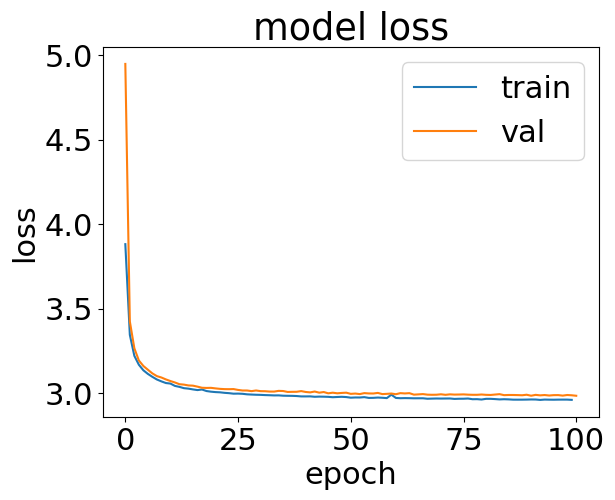

DONE SAVING PRETRAINED MODEL
   | Name                                         | Type                 | Params | Mode 
-----------------------------------------------------------------------------------------------
0  | task_loss_fn                                 | MSELoss              | 0      | train
1  | mask_loss_fn                                 | BCELoss              | 0      | train
2  | categorical_feature_loss_fn                  | BCELoss              | 0      | train
3  | continuous_feature_loss_fn                   | MSELoss              | 0      | train
4  | consistency_loss_fn                          | MSELoss              | 0      | train
5  | model                                        | VIME                 | 278 K  | train
6  | model._VIME__encoder                         | VIMESelfSupervised   | 177 K  | train
7  | model._VIME__encoder.encoder                 | MLP                  | 140 K  | train
8  | model._VIME__encoder.encoder.linear_0        | Linear       

In [2]:
s3l_training(pretrain=True, # if True First Phase training
             use_pretrained_model=False, # if True Second Phase learning
             pt_type='vime', 
             pt_folder='FP3')